In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 1.读取数据
data = pd.read_csv('../data/KaggleCredit2.csv', index_col=0)
data.dropna(inplace=True)

In [2]:
# 2. 数据标准化

cols = data.columns[1:]
scaler = StandardScaler()
data[cols] = scaler.fit_transform(data[cols])  # 假设第一列是ID列，从第二列开始是特征列

In [3]:
# 3. 提取样本数据和标签

X = data.drop('SeriousDlqin2yrs', axis=1)
y = data['SeriousDlqin2yrs']

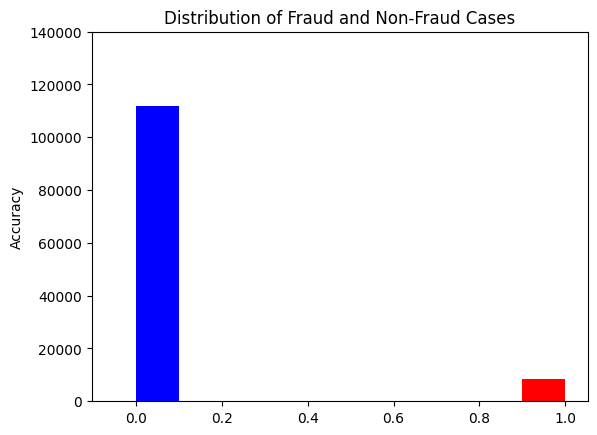

In [4]:
# 3.1 可视化分析样本分布情况

fraud_cases = data[data['SeriousDlqin2yrs'] == 1]
non_fraud_cases = data[data['SeriousDlqin2yrs'] == 0]
fraud_cases_count = fraud_cases.shape[0]
non_fraud_cases_count = non_fraud_cases.shape[0]

fraud_range = [0.90, 0.95]
non_fraud_range = [0.0, 0.05]

plt.bar(fraud_range, [0, fraud_cases_count], width=0.1, color='red')
plt.bar(non_fraud_range, [0, non_fraud_cases_count], width=0.1, color='blue')

plt.ylabel('Accuracy')
plt.title('Distribution of Fraud and Non-Fraud Cases')

plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])  # 设置x轴刻度为[0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(range(0, 140001, 20000))  # 设置y轴刻度间隔为20000
plt.show()

In [5]:
# 4. 拆分数据集

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Train Data:", X_train.shape, ", Train Data Label:", y_train.shape)
print("Test Data:", X_test.shape, ", Test Data Label:", y_test.shape)

Train Data: (84188, 10) , Train Data Label: (84188,)
Test Data: (36081, 10) , Test Data Label: (36081,)


In [6]:
# 5. 构建SVM模型并进行训练和预测

model = SVC()
model.fit(X_train[['NumberOfTime60-89DaysPastDueNotWorse']], y_train)

SVC()

In [7]:
# 6. 分析结果

y_pred_svm = model.predict(X_test[['NumberOfTime60-89DaysPastDueNotWorse']])
print('Report Result:\n', classification_report(y_test, y_pred_svm))

accuracy = model.score(X_test[['NumberOfTime60-89DaysPastDueNotWorse']], y_test)

print('Accuracy:', accuracy)

total_exceptions = len(y_pred_svm[y_pred_svm == 1])
total_normal = len(y_pred_svm[y_pred_svm == 0])
print('Predicting Total Credit Card Exceptions:', total_exceptions)
print('Predicted credit card normal total:', total_normal)

Report Result:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     33548
           1       0.57      0.04      0.07      2533

    accuracy                           0.93     36081
   macro avg       0.75      0.52      0.52     36081
weighted avg       0.91      0.93      0.90     36081

Accuracy: 0.9303788697652504
Predicting Total Credit Card Exceptions: 157
Predicted credit card normal total: 35924
